In [1]:
#loads the relevant libraries
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
import pandas as pd
import pgeocode
from shapely.geometry import Point 
import geoplot as gplt
import geoplot.crs as gcrs
import geopy.distance
import math

In [2]:
#loads the database of libraries
#I generated this list based on a combination of the croydon borough council website and internet searches
croydon_libs = pd.read_csv("croydon_libraries.csv")
pcode = pgeocode.Nominatim(country="GB")

In [3]:
#creates a function to convert a postcode into longitude and latitude coordinates
def getlonglat(post_code):
        return pcode.query_postal_code(post_code)['latitude'], pcode.query_postal_code(post_code)['longitude']        
#applies the function to all records in the database
croydon_libs['longlat'] = croydon_libs['postcode'].apply(getlonglat)

In [4]:
#check the list of libraries with the postcodes added
croydon_libs

,library,address_1,address_2,address_3,postcode,closing,longlat
0,Ashburton Library,Ashburton Learning Village,Shirley Road,Croydon,CR9 7AL,False,"(51.3833, -0.1)"
1,Bradmore Green Library,Bradmore Way,Coulsdon,Croydon,CR5 1PE,True,"(51.3096, -0.15703333333333333)"
2,Broad Green Library,89 Canterbury Road,NaN,Croydon,CR0 3HA,True,"(51.3776, -0.060975)"
3,New Addington Library,Central Parade,New Addington,NaN,CR0 0JD,False,"(51.3776, -0.060975)"
4,Central Library,Croydon Clocktower,Katharine Street,Croydon,CR9 1ET,False,"(51.3833, -0.1)"
5,Norbury Library,Beatrice Avenue,Norbury,NaN,SW16 4UW,False,"(51.4167, -0.12426666666666668)"
6,Coulsdon Library,Brighton Road,Coulsdon,NaN,CR5 2NH,False,"(51.3096, -0.15703333333333333)"
7,Purley Library,Banstead Road,Purley,NaN,CR8 3YH,False,"(51.3368, -0.10655)"
8,Sanderstead Library,Farm Fields,NaN,South Croydon,CR2 0HL,True,"(51.3359, -0.0778)"
9,Selsdon Library,Selsdon Library,Addington Road,Selsdon,CR2 8LA,False,"(51.3359, -0.0778)"


In [5]:
#creates a geometry column for use in geographic plotting
croydon_libs['geometry'] = [Point(xy) for xy in zip(croydon_libs['longlat'])]

In [6]:
#check the libraries dataframe with the geometry added
croydon_libs

,library,address_1,address_2,address_3,postcode,closing,longlat,geometry
0,Ashburton Library,Ashburton Learning Village,Shirley Road,Croydon,CR9 7AL,False,"(51.3833, -0.1)",POINT (51.3833 -0.1)
1,Bradmore Green Library,Bradmore Way,Coulsdon,Croydon,CR5 1PE,True,"(51.3096, -0.15703333333333333)",POINT (51.3096 -0.1570333333333333)
2,Broad Green Library,89 Canterbury Road,NaN,Croydon,CR0 3HA,True,"(51.3776, -0.060975)",POINT (51.3776 -0.060975)
3,New Addington Library,Central Parade,New Addington,NaN,CR0 0JD,False,"(51.3776, -0.060975)",POINT (51.3776 -0.060975)
4,Central Library,Croydon Clocktower,Katharine Street,Croydon,CR9 1ET,False,"(51.3833, -0.1)",POINT (51.3833 -0.1)
5,Norbury Library,Beatrice Avenue,Norbury,NaN,SW16 4UW,False,"(51.4167, -0.12426666666666668)",POINT (51.4167 -0.1242666666666667)
6,Coulsdon Library,Brighton Road,Coulsdon,NaN,CR5 2NH,False,"(51.3096, -0.15703333333333333)",POINT (51.3096 -0.1570333333333333)
7,Purley Library,Banstead Road,Purley,NaN,CR8 3YH,False,"(51.3368, -0.10655)",POINT (51.3368 -0.10655)
8,Sanderstead Library,Farm Fields,NaN,South Croydon,CR2 0HL,True,"(51.3359, -0.0778)",POINT (51.3359 -0.07779999999999999)
9,Selsdon Library,Selsdon Library,Addington Road,Selsdon,CR2 8LA,False,"(51.3359, -0.0778)",POINT (51.3359 -0.07779999999999999)


In [8]:
#reads in the database of postcodes in Croydon borough
#source:https://www.doogal.co.uk/AdministrativeAreas.php?district=E09000008
croydon_pcodes = pd.read_csv("croydon postcodes.csv")

In [9]:
#creates a geometric point for each postcode (not currently used)
croydon_pcodes['geometry'] = [Point(xy) for xy in zip(croydon_pcodes['Longitude'], croydon_pcodes['Latitude'])]

In [10]:
#converts the dataframe for geographic plotting (not currently used)
croydon_pcodes_gpd = gpd.GeoDataFrame(croydon_pcodes)

In [12]:
#combines the longitude and latitude into one cell
croydon_pcodes_gpd['longlat'] = list(zip(croydon_pcodes_gpd['Latitude'],croydon_pcodes_gpd['Longitude']))

In [13]:
#check the postcodes dataframe
croydon_pcodes_gpd

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,Ward,Parish,Introduced,Terminated,Altitude,Country,Last Updated,Quality,LSOA Code,LSOA Name,geometry,longlat
0,BR3 3BZ,Yes,51.378711,-0.027304,537388,166253,TQ373662,Shirley South,"Croydon, unparished area",1980-01-01,NaN,68,England,2021-02-21,Within the building of the matched address clo...,E01001135,Croydon 025D,POINT (-0.02730 51.37871),"(51.378710999999996, -0.027304000000000002)"
1,CR0 0AA,Yes,51.340340,-0.005061,539052,162028,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,NaN,156,England,2021-02-21,Within the building of the matched address clo...,E01001079,Croydon 036B,POINT (-0.00506 51.34034),"(51.340340000000005, -0.0050609999999999995)"
2,CR0 0AB,Yes,51.337592,-0.002108,539266,161728,TQ392617,New Addington South,"Croydon, unparished area",1980-01-01,NaN,159,England,2021-02-21,Within the building of the matched address clo...,E01001081,Croydon 036D,POINT (-0.00211 51.33759),"(51.337592, -0.0021079999999999996)"
3,CR0 0AD,Yes,51.335321,-0.001331,539327,161477,TQ393614,New Addington South,"Croydon, unparished area",1980-01-01,NaN,163,England,2021-02-21,Within the building of the matched address clo...,E01001079,Croydon 036B,POINT (-0.00133 51.33532),"(51.335321, -0.0013310000000000002)"
4,CR0 0AE,Yes,51.340719,-0.004528,539088,162071,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,NaN,157,England,2021-02-21,Within the building of the matched address clo...,E01001079,Croydon 036B,POINT (-0.00453 51.34072),"(51.340719, -0.004528)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13133,SW16 5TR,Yes,51.412446,-0.127191,530341,169822,TQ303698,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,NaN,35,England,2021-02-21,Within the building of the matched address clo...,E01001085,Croydon 004A,POINT (-0.12719 51.41245),"(51.412446, -0.127191)"
13134,SW16 5TS,Yes,51.412012,-0.125929,530430,169776,TQ304697,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,NaN,36,England,2021-02-21,Within the building of the matched address clo...,E01001085,Croydon 004A,POINT (-0.12593 51.41201),"(51.412012, -0.12592899999999999)"
13135,SW16 5TT,Yes,51.410608,-0.124738,530517,169622,TQ305696,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,NaN,37,England,2021-02-21,Within the building of the matched address clo...,E01001085,Croydon 004A,POINT (-0.12474 51.41061),"(51.410608, -0.12473800000000002)"
13136,SW16 5TU,Yes,51.410552,-0.125212,530484,169615,TQ304696,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,NaN,37,England,2021-02-21,Within the building of the matched address clo...,E01001085,Croydon 004A,POINT (-0.12521 51.41055),"(51.410552, -0.125212)"


In [18]:
#Function for calculating distance in metres based on two longlat points
#Source:
# Haversine formula example in Python
# Author: Wayne Dyck
# https://gist.github.com/rochacbruno/2883505
# modified by me

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371000 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [19]:
#calculates the distance between each postcode and each of the libraries
for i in croydon_libs.index:
    temp_distance = []
    library = croydon_libs.loc[i]['longlat']
    column_name = croydon_libs.loc[i]['library']
    for i in croydon_pcodes_gpd.index:
        temp_distance.append(distance(croydon_pcodes_gpd.loc[i]['longlat'],library))
    croydon_pcodes_gpd[column_name] = temp_distance

In [20]:
#check the new values
croydon_pcodes_gpd.sort_values(by='Selsdon Library')

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,Ward,Parish,Introduced,...,Central Library,Norbury Library,Coulsdon Library,Purley Library,Sanderstead Library,Selsdon Library,Shirley Library,South Norwood Library,Thornton Heath Library,Upper Norwood Library
4536,CR2 8RE,Yes,51.336770,-0.077114,534044,161497,TQ340614,Sanderstead,"Croydon, unparished area",1980-01-01,...,5412.419802,9471.222587,6322.079334,2044.865187,107.840628,107.840628,4676.350591,6987.161595,5412.419802,9182.436908
4701,CR2 9EA,Yes,51.334811,-0.077742,534006,161278,TQ340612,Sanderstead,"Croydon, unparished area",1980-01-01,...,5608.853316,9661.295337,6182.106133,2013.463044,121.158293,121.158293,4898.299964,7207.858121,5608.853316,9397.421421
2817,CR2 0HE,Yes,51.336925,-0.078917,533918,161511,TQ339615,Sanderstead,"Croydon, unparished area",1980-01-01,...,5360.414885,9412.465141,6220.703377,1919.658590,137.882082,137.882082,4691.302670,6981.275463,5360.414885,9158.540676
4714,CR2 9ES,Yes,51.334292,-0.077936,533994,161220,TQ339612,Sanderstead,"Croydon, unparished area",1980-01-01,...,5660.693743,9711.244374,6144.116516,2007.280381,179.050888,179.050888,4957.559788,7266.506775,5660.693743,9454.332295
2819,CR2 0HG,Yes,51.337402,-0.079443,533880,161563,TQ338615,Sanderstead,"Croydon, unparished area",1980-01-01,...,5299.455681,9350.279573,6215.022066,1884.247735,202.289528,202.289528,4650.126074,6932.240021,5299.455681,9103.918181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12768,SW16 3EH,Yes,51.421889,-0.112134,531361,170899,TQ313708,Norbury Park,"Croydon, unparished area",1980-01-01,...,4372.678324,1020.161424,12869.175114,9469.398955,9854.003544,9854.003544,6070.290893,3901.766304,4372.678324,1899.975197
12784,SW16 3JE,Yes,51.422882,-0.110152,531496,171013,TQ314710,Norbury Park,"Croydon, unparished area",1980-01-01,...,4457.299789,1196.020520,13010.061292,9575.145598,9929.164591,9929.164591,6082.010823,3870.851567,4457.299789,1786.397153
12769,SW16 3EJ,Yes,51.422769,-0.112069,531363,170997,TQ313709,Norbury Park,"Croydon, unparished area",1980-01-01,...,4467.890947,1082.041455,12965.213080,9566.987517,9947.894001,9947.894001,6147.321323,3961.765549,4467.890947,1913.383326
12770,SW16 3EL,Yes,51.422625,-0.113140,531289,170979,TQ312709,Norbury Park,"Croydon, unparished area",1980-01-01,...,4466.730053,1014.567036,12931.952040,9554.257982,9950.408985,9950.408985,6177.477358,4007.798229,4466.730053,1982.957304


In [24]:
#get a list of the columns in the dataframe
croydon_pcodes_gpd.columns.tolist()

['Postcode',
 'In Use?',
 'Latitude',
 'Longitude',
 'Easting',
 'Northing',
 'Grid Ref',
 'Ward',
 'Parish',
 'Introduced',
 'Terminated',
 'Altitude',
 'Country',
 'Last Updated',
 'Quality',
 'LSOA Code',
 'LSOA Name',
 'geometry',
 'longlat',
 'Ashburton Library',
 'Bradmore Green Library',
 'Broad Green Library',
 'New Addington Library',
 'Central Library',
 'Norbury Library',
 'Coulsdon Library',
 'Purley Library',
 'Sanderstead Library',
 'Selsdon Library',
 'Shirley Library',
 'South Norwood Library',
 'Thornton Heath Library',
 'Upper Norwood Library']

In [25]:
#get the distance to the nearest library and put it in a new column
croydon_pcodes_gpd['nearest'] = croydon_pcodes_gpd.iloc[:,19:].min(axis=1)

In [33]:
#load up a spreadsheet of Index of Multiple Deprivation scores by LSOA
#source:https://opendatacommunities.org/resource?uri=http%3A%2F%2Fopendatacommunities.org%2Fdata%2Fsocietal-wellbeing%2Fimd2019%2Findices
lsoa_imd = pd.read_csv('lsoa_imd.csv')

In [34]:
#check the dataframe
lsoa_imd.head()

,FeatureCode,DateCode,Measurement,Units,Value,Indices of Deprivation
0,E01005602,2019,Score,NaN,51.400,a. Index of Multiple Deprivation (IMD)
1,E01005478,2019,Score,NaN,27.566,a. Index of Multiple Deprivation (IMD)
2,E01005386,2019,Score,NaN,64.436,a. Index of Multiple Deprivation (IMD)
3,E01005588,2019,Score,NaN,35.244,a. Index of Multiple Deprivation (IMD)
4,E01005319,2019,Score,NaN,45.470,a. Index of Multiple Deprivation (IMD)


In [52]:
#Selects a list of those libraries that are earmarked for closure
closing_libs = list(croydon_libs['library'][croydon_libs['closing'] == True])
closing_libs

['Bradmore Green Library',
 'Broad Green Library',
 'Sanderstead Library',
 'Shirley Library',
 'South Norwood Library']

In [121]:
#creates a new version of the data excluding the closing libraries
croydon_pcodes_closing_gpd = croydon_pcodes_closing.drop(columns=closing_libs)
croydon_pcodes_closing_gpd.head()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,Ward,Parish,Introduced,...,Ashburton Library,New Addington Library,Central Library,Norbury Library,Coulsdon Library,Purley Library,Selsdon Library,Thornton Heath Library,Upper Norwood Library,nearest
0,BR3 3BZ,Yes,51.378711,-0.027304,537388,166253,TQ373662,Shirley South,"Croydon, unparished area",1980-01-01,...,5070.917699,2340.211276,5070.917699,7943.191961,11842.586473,7210.848995,5912.287983,5070.917699,6027.600489,2340.211276
1,CR0 0AA,Yes,51.340340,-0.005061,539052,162028,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,8140.555263,5677.866710,8140.555263,11855.138481,11099.372006,7060.951615,5076.953568,8140.555263,10379.329217,5076.953568
2,CR0 0AB,Yes,51.337592,-0.002108,539266,161728,TQ392617,New Addington South,"Croydon, unparished area",1980-01-01,...,8486.993264,6041.410016,8486.993264,12217.377103,11206.390889,7255.854285,5261.547201,8486.993264,10747.228938,5261.547201
3,CR0 0AD,Yes,51.335321,-0.001331,539327,161477,TQ393614,New Addington South,"Croydon, unparished area",1980-01-01,...,8683.220935,6265.303073,8683.220935,12437.511124,11191.344232,7311.326918,5312.680788,8683.220935,10989.783693,5312.680788
4,CR0 0AE,Yes,51.340719,-0.004528,539088,162071,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,8145.959574,5672.683994,8145.959574,11850.879254,11147.581552,7100.351934,5118.024352,8145.959574,10363.644076,5118.024352


In [122]:
#check the columns in the new dataframe
list(croydon_pcodes_closing_gpd)

['Postcode',
 'In Use?',
 'Latitude',
 'Longitude',
 'Easting',
 'Northing',
 'Grid Ref',
 'Ward',
 'Parish',
 'Introduced',
 'Terminated',
 'Altitude',
 'Country',
 'Last Updated',
 'Quality',
 'LSOA Code',
 'LSOA Name',
 'geometry',
 'longlat',
 'Ashburton Library',
 'New Addington Library',
 'Central Library',
 'Norbury Library',
 'Coulsdon Library',
 'Purley Library',
 'Selsdon Library',
 'Thornton Heath Library',
 'Upper Norwood Library',
 'nearest']

In [124]:
#calculate a new value for the nearest library with the closing ones excluded
croydon_pcodes_closing_gpd['nearest'] = croydon_pcodes_closing_gpd.iloc[:,19:-1].min(axis=1)
croydon_pcodes_closing_gpd

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,Ward,Parish,Introduced,...,Ashburton Library,New Addington Library,Central Library,Norbury Library,Coulsdon Library,Purley Library,Selsdon Library,Thornton Heath Library,Upper Norwood Library,nearest
0,BR3 3BZ,Yes,51.378711,-0.027304,537388,166253,TQ373662,Shirley South,"Croydon, unparished area",1980-01-01,...,5070.917699,2340.211276,5070.917699,7943.191961,11842.586473,7210.848995,5912.287983,5070.917699,6027.600489,2340.211276
1,CR0 0AA,Yes,51.340340,-0.005061,539052,162028,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,8140.555263,5677.866710,8140.555263,11855.138481,11099.372006,7060.951615,5076.953568,8140.555263,10379.329217,5076.953568
2,CR0 0AB,Yes,51.337592,-0.002108,539266,161728,TQ392617,New Addington South,"Croydon, unparished area",1980-01-01,...,8486.993264,6041.410016,8486.993264,12217.377103,11206.390889,7255.854285,5261.547201,8486.993264,10747.228938,5261.547201
3,CR0 0AD,Yes,51.335321,-0.001331,539327,161477,TQ393614,New Addington South,"Croydon, unparished area",1980-01-01,...,8683.220935,6265.303073,8683.220935,12437.511124,11191.344232,7311.326918,5312.680788,8683.220935,10989.783693,5312.680788
4,CR0 0AE,Yes,51.340719,-0.004528,539088,162071,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,8145.959574,5672.683994,8145.959574,11850.879254,11147.581552,7100.351934,5118.024352,8145.959574,10363.644076,5118.024352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13133,SW16 5TR,Yes,51.412446,-0.127191,530341,169822,TQ303698,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,...,3749.908217,6009.875266,3749.908217,514.664932,11622.141832,8532.594108,9176.018365,3749.908217,3015.681291,514.664932
13134,SW16 5TS,Yes,51.412012,-0.125929,530430,169776,TQ304697,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,...,3664.522025,5911.880259,3664.522025,533.877364,11590.667398,8470.674834,9098.752341,3664.522025,2943.749992,533.877364
13135,SW16 5TT,Yes,51.410608,-0.124738,530517,169622,TQ305696,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,...,3487.964396,5748.270851,3487.964396,678.187701,11453.229541,8303.608000,8923.225077,3487.964396,2911.811293,678.187701
13136,SW16 5TU,Yes,51.410552,-0.125212,530484,169615,TQ304696,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,...,3498.868318,5769.664722,3498.868318,686.762861,11440.722098,8302.523310,8929.502675,3498.868318,2944.912045,686.762861


In [125]:
#add the new values to the original dataframe and calculate the difference between the two distances - the increase in distance to the nearest library, after the closures
croydon_pcodes_gpd['nearest_closing'] = croydon_pcodes_closing_gpd['nearest']
croydon_pcodes_gpd['change'] = croydon_pcodes_gpd['nearest_closing'] - croydon_pcodes_gpd['nearest'] 
croydon_pcodes_gpd['change'].describe()

count    13138.000000
mean        95.561691
std        362.063358
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2443.815703
Name: change, dtype: float64

In [126]:
#match the LSOAs in the dataframe with their IMD scores
imd_dict = {}
for i in croydon_pcodes_gpd.index:
    this_code = croydon_pcodes_gpd.loc[i]['LSOA Code']
    temp = list(lsoa_imd['Value'][lsoa_imd['FeatureCode'] == this_code])
    imd_dict[this_code] = temp[0]

In [128]:
#map these scores onto the original dataframe
croydon_pcodes_gpd['imd'] = croydon_pcodes_gpd['LSOA Code'].map(imd_dict)

In [143]:
#check the dataframe
croydon_pcodes_gpd.head()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,Ward,Parish,Introduced,...,Selsdon Library,Shirley Library,South Norwood Library,Thornton Heath Library,Upper Norwood Library,nearest,nearest_closing,change,imd,decile
0,BR3 3BZ,Yes,51.378711,-0.027304,537388,166253,TQ373662,Shirley South,"Croydon, unparished area",1980-01-01,...,5912.287983,2340.211276,3693.658347,5070.917699,6027.600489,2340.211276,2340.211276,0.0,8.602,2
1,CR0 0AA,Yes,51.340340,-0.005061,539052,162028,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,5076.953568,5677.866710,7924.477472,8140.555263,10379.329217,5076.953568,5076.953568,0.0,33.984,9
2,CR0 0AB,Yes,51.337592,-0.002108,539266,161728,TQ392617,New Addington South,"Croydon, unparished area",1980-01-01,...,5261.547201,6041.410016,8292.508130,8486.993264,10747.228938,5261.547201,5261.547201,0.0,34.640,9
3,CR0 0AD,Yes,51.335321,-0.001331,539327,161477,TQ393614,New Addington South,"Croydon, unparished area",1980-01-01,...,5312.680788,6265.303073,8532.590072,8683.220935,10989.783693,5312.680788,5312.680788,0.0,33.984,9
4,CR0 0AE,Yes,51.340719,-0.004528,539088,162071,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,5118.024352,5672.683994,7910.435798,8145.959574,10363.644076,5118.024352,5118.024352,0.0,33.984,9


In [142]:
#arrange the postcodes into deciles by IMD score
#(Note this is their decile compared to other postcodes in the borough - not nationally)
croydon_pcodes_gpd['decile'] = pd.qcut(croydon_pcodes_gpd['imd'],10, labels=(range(1,11)))

In [147]:
#create a new dataframe grouping the rows by the decile they are in and calculating the mean of values in the group
avg_change_decile = croydon_pcodes_gpd.groupby(by='decile').mean()

In [148]:
#check the new dataframe
avg_change_decile

,Latitude,Longitude,Easting,Northing,Altitude,Ashburton Library,Bradmore Green Library,Broad Green Library,New Addington Library,Central Library,...,Sanderstead Library,Selsdon Library,Shirley Library,South Norwood Library,Thornton Heath Library,Upper Norwood Library,nearest,nearest_closing,change,imd
decile,,,,,,,,,,,,,,,,,,,,,
1,51.329021,-0.108150,531904.030980,160579.584294,121.926513,6460.205794,4301.990997,6544.659013,6544.659013,6460.205794,...,3139.779346,3139.779346,6544.659013,8490.254195,6460.205794,10352.892920,1612.235499,1612.235499,0.000000,6.856696
2,51.343517,-0.095074,532772.137743,162215.445914,90.917510,5613.108292,5880.459946,5064.863517,5064.863517,5613.108292,...,4121.801648,4121.801648,5064.863517,6904.816160,5613.108292,8892.310564,1514.231875,1514.231875,0.000000,9.654703
3,51.358369,-0.097094,532589.806818,163862.921053,78.323565,4449.639985,7164.157972,4645.306169,4645.306169,4449.639985,...,4149.707235,4149.707235,4645.306169,5761.408726,4449.639985,7168.776094,1473.799916,1474.002778,0.202862,14.470863
4,51.373939,-0.093110,532822.306991,165601.128267,65.247416,1547.345074,8500.206909,2597.195111,2597.195111,1547.345074,...,4601.711523,4601.711523,2597.195111,3457.307459,1547.345074,5123.704200,1093.691995,1097.143035,3.451040,17.610648
5,51.373474,-0.101423,532244.888535,165534.657643,72.668790,3809.019205,8308.297261,4639.856209,4639.856209,3809.019205,...,5395.401858,5395.401858,4639.856209,4708.317386,3809.019205,5543.834825,1436.056380,1515.086045,79.029665,19.040369
6,51.386850,-0.095032,532651.048522,167033.601213,78.510235,3366.777397,9776.118166,4281.235024,4281.235024,3366.777397,...,6284.764380,6284.764380,4281.235024,3702.914989,3366.777397,3846.791764,1092.150758,1140.190076,48.039318,21.142520
7,51.381086,-0.105713,531924.207004,166373.414008,61.044358,3058.354821,8852.501399,4459.686230,4459.686230,3058.354821,...,6343.736420,6343.736420,4459.686230,4011.900408,3058.354821,4726.293849,1359.573655,1525.025815,165.452161,24.860983
8,51.383654,-0.096292,532572.933483,166675.900598,55.286996,1662.991931,9340.330707,3071.886507,3071.886507,1662.991931,...,5640.597473,5640.597473,3071.886507,2977.448783,1662.991931,4233.751694,1178.869069,1357.495453,178.626385,30.605513
9,51.377998,-0.075152,534060.911146,166085.661730,78.554170,3117.793463,9993.394189,3426.748053,3426.748053,3117.793463,...,5800.864527,5800.864527,3426.748053,3373.379463,3117.793463,4956.816489,1731.787237,2198.414013,466.626776,36.138280


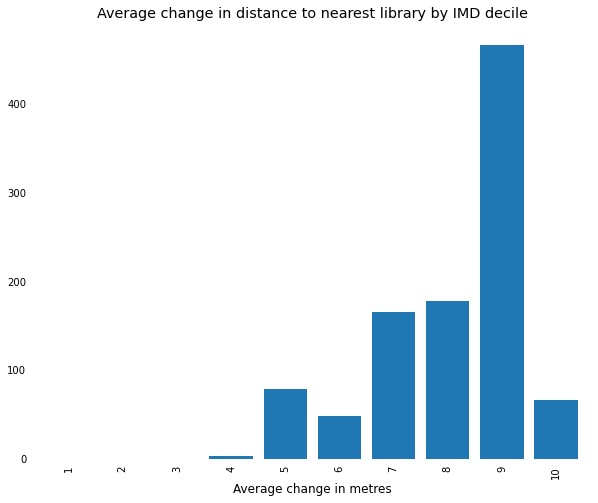

In [150]:
#plot the change in distance to nearest library by IMD decile
ax = avg_change_decile['change'].plot(kind='bar',
                                                  cmap='tab20',
                                                  figsize=(10,8),
                                                  sort_columns=True,
                                                  width=0.8)
handles, labels = ax.get_legend_handles_labels()
ax.axes.set_xlabel("Average change in metres", fontsize='large')
ax.tick_params(bottom=False, left=False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Average change in distance to nearest library by IMD decile", fontsize='x-large')
plt.savefig("change_decile.png")
plt.show()

In [170]:
#find the max change in distance for each decile
max_dict = {}
for i in avg_change_decile.index:
    max_dict[i+1] = croydon_pcodes_gpd['change'][croydon_pcodes_gpd['decile'] == i+1].max()
max_dict

{1: 0.0,
 2: 0.0,
 3: 142.22819623451483,
 4: 627.2726265241619,
 5: 1485.3198133501114,
 6: 1867.1326133659065,
 7: 2287.847143163006,
 8: 2443.8157025785467,
 9: 2125.778524108,
 10: 2335.5659816836687}

In [164]:
#reset the index of the chart for easy manipulation
avg_change_decile.reset_index(inplace=True)

In [173]:
#map the max change to a new column
avg_change_decile['max_change'] = avg_change_decile['decile'].map(max_dict)

In [174]:
#check the dataframe
avg_change_decile

,decile,Latitude,Longitude,Easting,Northing,Altitude,Ashburton Library,Bradmore Green Library,Broad Green Library,New Addington Library,...,Selsdon Library,Shirley Library,South Norwood Library,Thornton Heath Library,Upper Norwood Library,nearest,nearest_closing,change,imd,max_change
0,1,51.329021,-0.108150,531904.030980,160579.584294,121.926513,6460.205794,4301.990997,6544.659013,6544.659013,...,3139.779346,6544.659013,8490.254195,6460.205794,10352.892920,1612.235499,1612.235499,0.000000,6.856696,0.000000
1,2,51.343517,-0.095074,532772.137743,162215.445914,90.917510,5613.108292,5880.459946,5064.863517,5064.863517,...,4121.801648,5064.863517,6904.816160,5613.108292,8892.310564,1514.231875,1514.231875,0.000000,9.654703,0.000000
2,3,51.358369,-0.097094,532589.806818,163862.921053,78.323565,4449.639985,7164.157972,4645.306169,4645.306169,...,4149.707235,4645.306169,5761.408726,4449.639985,7168.776094,1473.799916,1474.002778,0.202862,14.470863,142.228196
3,4,51.373939,-0.093110,532822.306991,165601.128267,65.247416,1547.345074,8500.206909,2597.195111,2597.195111,...,4601.711523,2597.195111,3457.307459,1547.345074,5123.704200,1093.691995,1097.143035,3.451040,17.610648,627.272627
4,5,51.373474,-0.101423,532244.888535,165534.657643,72.668790,3809.019205,8308.297261,4639.856209,4639.856209,...,5395.401858,4639.856209,4708.317386,3809.019205,5543.834825,1436.056380,1515.086045,79.029665,19.040369,1485.319813
5,6,51.386850,-0.095032,532651.048522,167033.601213,78.510235,3366.777397,9776.118166,4281.235024,4281.235024,...,6284.764380,4281.235024,3702.914989,3366.777397,3846.791764,1092.150758,1140.190076,48.039318,21.142520,1867.132613
6,7,51.381086,-0.105713,531924.207004,166373.414008,61.044358,3058.354821,8852.501399,4459.686230,4459.686230,...,6343.736420,4459.686230,4011.900408,3058.354821,4726.293849,1359.573655,1525.025815,165.452161,24.860983,2287.847143
7,8,51.383654,-0.096292,532572.933483,166675.900598,55.286996,1662.991931,9340.330707,3071.886507,3071.886507,...,5640.597473,3071.886507,2977.448783,1662.991931,4233.751694,1178.869069,1357.495453,178.626385,30.605513,2443.815703
8,9,51.377998,-0.075152,534060.911146,166085.661730,78.554170,3117.793463,9993.394189,3426.748053,3426.748053,...,5800.864527,3426.748053,3373.379463,3117.793463,4956.816489,1731.787237,2198.414013,466.626776,36.138280,2125.778524
9,10,51.380413,-0.100880,532263.177606,166307.315058,52.305019,1824.063750,8989.014154,3592.702257,3592.702257,...,5614.641702,3592.702257,3623.724151,1824.063750,4750.292170,1387.841920,1454.396806,66.554886,42.762965,2335.565982


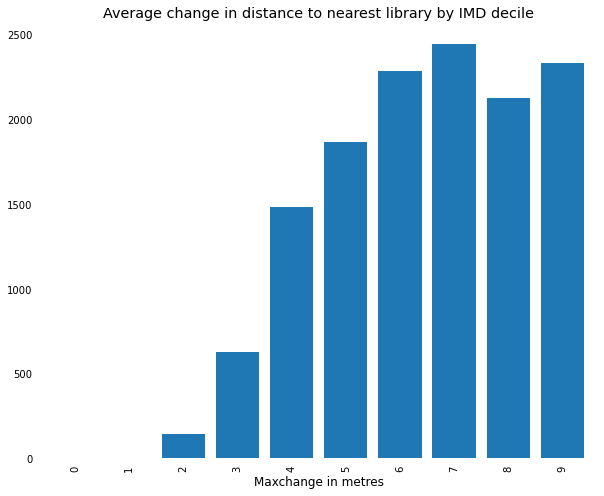

In [175]:
#plot the max change for each decile
ax = avg_change_decile['max_change'].plot(kind='bar',
                                                  cmap='tab20',
                                                  figsize=(10,8),
                                                  sort_columns=True,
                                                  width=0.8)
handles, labels = ax.get_legend_handles_labels()
ax.axes.set_xlabel("Maxchange in metres", fontsize='large')
ax.tick_params(bottom=False, left=False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Average change in distance to nearest library by IMD decile", fontsize='x-large')
plt.savefig("max_change_decile.png")
plt.show()